In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
heart_data= pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Heart Data Output by Sex

<AxesSubplot:xlabel='output', ylabel='count'>

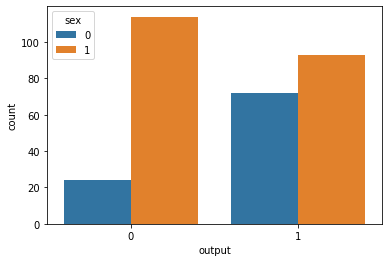

In [4]:
sns.countplot(heart_data['output'], hue=heart_data['sex'])

### Age

<AxesSubplot:xlabel='age', ylabel='Density'>

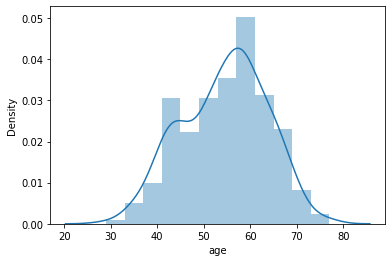

In [5]:
sns.distplot(heart_data['age'])

### Chest Pain type
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

Text(0.5, 1.0, 'Chest Pain Type')

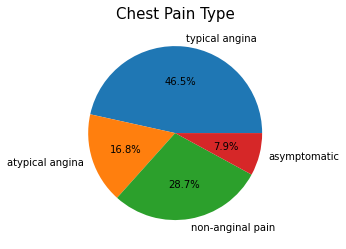

In [6]:
typical_angina = "{:.2f}".format((len(heart_data[heart_data['cp']==0])/len(heart_data['cp'])))
atypical_angina = "{:.2f}".format((len(heart_data[heart_data['cp']==1])/len(heart_data['cp'])))
non_anginal_pain ="{:.2f}".format((len(heart_data[heart_data['cp']==2])/len(heart_data['cp'])))
asymptomatic = "{:.2f}".format((len(heart_data[heart_data['cp']==3])/len(heart_data['cp'])))

chest_pain_type = [typical_angina,atypical_angina, non_anginal_pain ,asymptomatic ]
labels = 'typical angina','atypical angina', 'non-anginal pain','asymptomatic'
plt.pie(chest_pain_type,labels=labels,autopct='%1.1f%%')
plt.title('Chest Pain Type',fontsize=15)

### Exercise induced angina

Text(0.5, 1.0, 'Exercise induced angina')

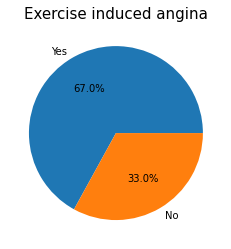

In [7]:
exercise_with_angina = "{:.2f}".format((len(heart_data[heart_data['exng']==0])/len(heart_data['exng'])))
exercise_without_angina = "{:.2f}".format((len(heart_data[heart_data['exng']==1])/len(heart_data['exng'])))

exercise_angina = [exercise_with_angina, exercise_without_angina  ]
labels = 'Yes', 'No'
plt.pie(exercise_angina,labels=labels,autopct='%1.1f%%')
plt.title('Exercise induced angina',fontsize=15)

### Number of Major Vessels

Text(0.5, 1.0, 'Number of Major Vessels')

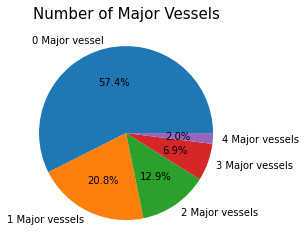

In [8]:
vessels_0 = "{:.2f}".format((len(heart_data[heart_data['caa']==0])/len(heart_data['caa'])))
vessels_1 = "{:.2f}".format((len(heart_data[heart_data['caa']==1])/len(heart_data['caa'])))
vessels_2 = "{:.2f}".format((len(heart_data[heart_data['caa']==2])/len(heart_data['caa'])))
vessels_3 = "{:.2f}".format((len(heart_data[heart_data['caa']==3])/len(heart_data['caa'])))
vessels_4 = "{:.2f}".format((len(heart_data[heart_data['caa']==4])/len(heart_data['caa'])))

major_vessels = [vessels_0, vessels_1, vessels_2, vessels_3, vessels_4]
labels = '0 Major vessel', '1 Major vessels', '2 Major vessels','3 Major vessels', '4 Major vessels'
plt.pie(major_vessels,labels=labels,autopct='%1.1f%%')
plt.title('Number of Major Vessels',fontsize=15)

### Thalium Stress Test result

Text(0.5, 1.0, 'Thalium Stress Test result')

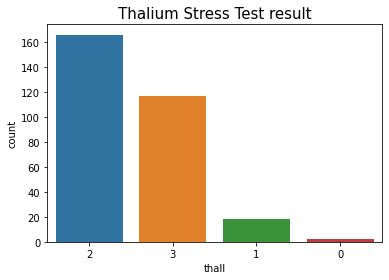

In [9]:
sns.countplot(heart_data['thall'], order= heart_data['thall'].value_counts().index )
plt.title('Thalium Stress Test result', fontsize=15)

### Fasting blood sugar > 120 mg/dl

Text(0.5, 1.0, 'Fasting blood sugar > 120 mg/dl')

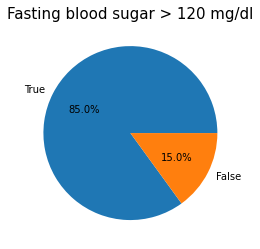

In [10]:
over_120 = "{:.2f}".format((len(heart_data[heart_data['fbs']==0])/len(heart_data['fbs'])))
less_120 = "{:.2f}".format((len(heart_data[heart_data['fbs']==1])/len(heart_data['fbs'])))

blood_suger_120 = [over_120, less_120]
labels = 'True', 'False'
plt.pie(blood_suger_120,labels=labels,autopct='%1.1f%%')
plt.title('Fasting blood sugar > 120 mg/dl',fontsize=15)

### Resting electrocardiographic results
- normal
- having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- showing probable or definite left ventricular hypertrophy by Estes' criteria

Text(0.5, 1.0, 'Resting electrocardiographic results')

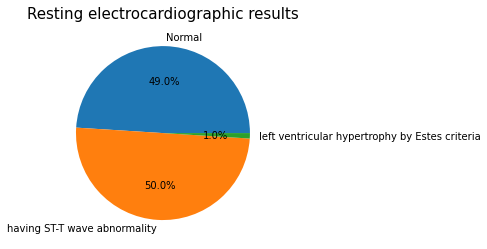

In [11]:
normal = "{:.2f}".format((len(heart_data[heart_data['restecg']==0])/len(heart_data['restecg'])))
ST_T= "{:.2f}".format((len(heart_data[heart_data['restecg']==1])/len(heart_data['restecg'])))
left_ventricular = "{:.2f}".format((len(heart_data[heart_data['restecg']==2])/len(heart_data['restecg'])))
Resting_electrocardiographic = [normal,ST_T, left_ventricular]
labels = 'Normal', 'having ST-T wave abnormality', 'left ventricular hypertrophy by Estes criteria'
plt.pie(Resting_electrocardiographic,labels=labels,autopct='%1.1f%%')
plt.title('Resting electrocardiographic results',fontsize=15)

## Label
- Blue Color
    - Normal
- Red Color
    - Heart Attack

### Relationship between Age and Heart Attack

Text(0.5, 1.0, 'Relationship between Age and Heart Attack')

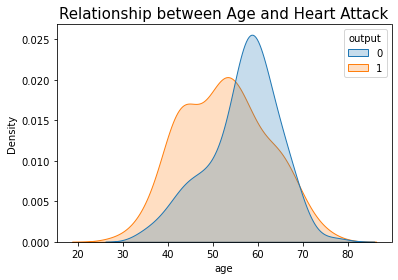

In [12]:
sns.kdeplot(heart_data['age'], hue= heart_data['output'], fill=True)
plt.title('Relationship between Age and Heart Attack', fontsize=15)

### Relationship between Resting blood pressure and Heart Attack

Text(0.5, 1.0, 'Relationship between Resting blood pressure and Heart Attack')

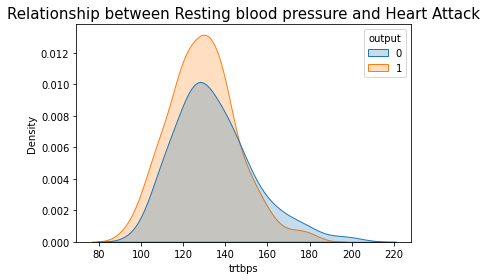

In [13]:
sns.kdeplot(heart_data['trtbps'], hue= heart_data['output'], fill=True)
plt.title('Relationship between Resting blood pressure and Heart Attack', fontsize=15)

###  cholestoral in mg/dl fetched via BMI sensor

Text(0.5, 1.0, 'Relationship between cholestoral and Heart Attack')

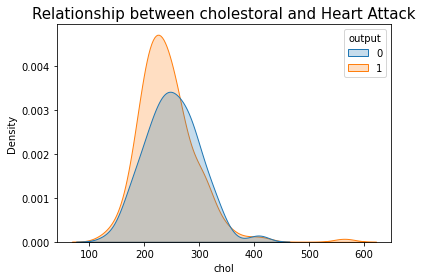

In [14]:
sns.kdeplot(heart_data['chol'], hue= heart_data['output'], fill=True)
plt.title('Relationship between cholestoral and Heart Attack', fontsize=15)

### Maximum heart rate achieved

Text(0.5, 1.0, 'Relationship between Maximum heart rate and Heart Attack')

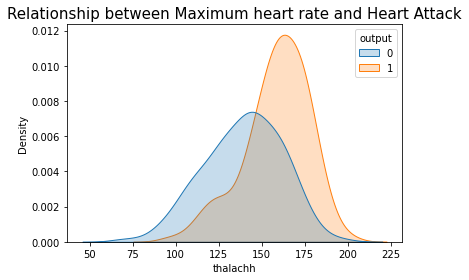

In [15]:
sns.kdeplot(heart_data['thalachh'], hue= heart_data['output'], fill=True)
plt.title('Relationship between Maximum heart rate and Heart Attack', fontsize=15)

In [16]:
X=heart_data.drop(["output"],axis=1)
y=heart_data["output"]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

model_logistic= LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression()

In [19]:
pred_logistic=model_logistic.predict(X_test)
logistic_score =model_logistic.score(X_train,y_train)
logistic_pred_score =round(logistic_score*100,2)
logistic_pred_score

86.79

In [20]:
print(classification_report(y_test,pred_logistic))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.82      0.93      0.87        45

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



## CatBoostClassifier

In [21]:
from catboost import CatBoostClassifier

model_catboost=CatBoostClassifier(loss_function='MultiClassOneVsAll',random_seed = 0)
model_catboost.fit(X_train,y_train, verbose = 1000)

0:	learn: 0.6848015	total: 51.3ms	remaining: 51.2s
999:	learn: 0.0713017	total: 955ms	remaining: 0us


In [22]:
pred_catboost=model_catboost.predict(X_test)
catboost_score =model_catboost.score(X_train,y_train)
catboost_pred_score =round(catboost_score*100,2)
catboost_pred_score

100.0

In [23]:
print(classification_report(y_test,pred_catboost))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80        46
           1       0.76      0.91      0.83        45

    accuracy                           0.81        91
   macro avg       0.83      0.81      0.81        91
weighted avg       0.83      0.81      0.81        91



## RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

model_randomforest= RandomForestClassifier()
model_randomforest.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
pred_randomforest=model_randomforest.predict(X_test)
randomforest_score =model_randomforest.score(X_train,y_train)
randomforest_pred_score =round(randomforest_score*100,2)
randomforest_pred_score

100.0

In [26]:
print(classification_report(y_test,pred_randomforest))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81        46
           1       0.78      0.89      0.83        45

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



## xgboost

In [27]:
import xgboost as xgb

model_xgboost= xgb.XGBClassifier()
model_xgboost.fit(X_train,y_train)

[22:34:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
pred_xgboost=model_xgboost.predict(X_test)
xgboost_score =model_xgboost.score(X_train,y_train)
xgboost_pred_score =round(xgboost_score*100,2)
xgboost_pred_score

100.0

In [29]:
print(classification_report(y_test,pred_xgboost))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        46
           1       0.76      0.84      0.80        45

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



## KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model_knn= KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
pred_knn=model_knn.predict(X_test)
knn_score =model_knn.score(X_train,y_train)
knn_pred_score =round(knn_score*100,2)
knn_pred_score

75.47

In [32]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.52      0.61        46
           1       0.62      0.80      0.70        45

    accuracy                           0.66        91
   macro avg       0.67      0.66      0.65        91
weighted avg       0.67      0.66      0.65        91



### LogisticRegression model give accuracy with 87%

## Conclusion
- Higher Blood Pressure, Higher Cholestrol and Higher Heart Rate leads to higher chance of heart attack.
- Male have more percentage to have heart attack
- Age from 50-65 years have the high chance of heart attack.